# Real-world application of ML: Identify mutant thermostable nanobodies with conserved function

We showcase the applicability of ML models for a potential real-world application. The question we ask is: "Can we identify alternative nanobodies that (1) are more thermostable than the wildtype and (2) preserve the wildtype's function and structure?"


- Predict mutant nanobodies with conserved function using nanoBert
- Predict the 3D structure of the wildtype and mutant nanobodies using AlphaFold2
- Predict Tm for the mutant nanobodies using TEMPRO
- Select putative thermostable mutant nanobodies

### 1. nanoBERT Example

Original [Colab](https://colab.research.google.com/#scrollTo=Xr_7FVCHUeFv&fileId=https%3A//huggingface.co/NaturalAntibody/nanoBERT/blob/main/nanoBERTExample.ipynb) for predicting functional mutations using [nanoBERT](https://academic.oup.com/bioinformaticsadvances/article/4/1/vbae033/7623636)

nanoBERT a is nanobody-specific transformer. Its primary application is positing infilling, predicting what amino acids could be available at a given position according to the nanobody-specific distribution.  

In [ ]:
# Install stadard library
! pip install --upgrade transformers

In [ ]:
from transformers import pipeline, RobertaTokenizer, AutoModel

In [ ]:
# Initialise the tokenizer
tokenizer = RobertaTokenizer.from_pretrained("NaturalAntibody/nanoBERT", return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Initialise model
unmasker = pipeline('fill-mask', model="NaturalAntibody/nanoBERT", tokenizer=tokenizer, top_k=20 )

pytorch_model.bin:   0%|          | 0.00/57.9M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
import os
import pandas as pd

current_directory = os.getcwd()
print(f"Current Directory: {current_directory}")

df_s = pd.read_csv("../data/sdab_data.csv", header=0, sep=";")
df_s.head()

Current Directory: /content


,id,name,seq,tm,doi,source,fr1,cdr1,fr2,cdr2,fr3,cdr3,fr4,target1,target2,target3,target4
0,>sdab1,NRL-N-C2,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,"67,5",https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVRPGGSLRLSC,AASGFTFSSYAMM,WVRQAPGKGLEWV,SAINGGGGST,SYADSVKGRFTISRDNAKNTLYLQMNSLKPEDTAVYYC,AKYQAAVHQEKEDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN
1,>sdab2,NRL-N-C2-hop,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,65,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVRPGGSLRLSC,AASGFTFSSYAMM,WVRQAPGKGLEWV,SAINGGGGST,SYADSVKGRFTISRDNAKNTLYLQMNSLKPEDTAVYYC,AKYQAAVHQEKEDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN
2,>sdab3,NRL-N-E2,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,62,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVQAGGSLRLSC,AASGRTDSTQHMA,WFRQAPGKEREFV,TAIQWRGGGT,SYTDSVKGRFTISRDNAKNTVYLEMNSLKPEDTAVYYC,ATNTRWTYFSPTVPDRYDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN
3,>sdab4,NRL-N-E2-hop,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,62,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVQAGGSLRLSC,AASGRTDSTQHMA,WFRQAPGKEREFV,TAIQWRGGGT,SYTDSVKGRFTISRDNAKNTVYLEMNSLKPEDTAVYYC,ATNTRWTYFSPTVPDRYDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN
4,>sdab5,NRL-N-E10,DVQLQASGGGLVQAGGSLRLSCAASARTFYTMGWFRQVLGKDREFV...,70,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,DVQLQASGGGLVQAGGSLRLSC,AASARTFYTMG,WFRQVLGKDREFV,GAIRWGVYATT,RYADSVKGRFSISRDDATNTVALQMNSLKPEDTAVYYC,AARAGPLGFELSATSSAEYDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN


In [ ]:
# Predict the residue probability at one or more masked positions
# mark position to predict with '<mask>'

mutations = pd.DataFrame(columns=["id", "tm", "crd3","wt_seq","position","wt","mut","mut_seq","prob_mut"])

for i in range(df_s.shape[0]):
  raw=df_s.loc[i,"seq"]
  cdr3=df_s.loc[i,"cdr3"]
  position = raw.find(cdr3)
  print(cdr3)
  for j in range(position, position+len(cdr3)):
    print(j,raw[j])
    seq = raw[:j] + "<mask>" + raw[j + 1:]
    residueProbability = unmasker(seq)
    # Print residue probabilities
    for scores in residueProbability:
      if scores['score']>0.01 and scores['token_str'] != raw[j]:
        print(f"Amino Acid : {scores['token_str']}, probability = {scores['score']}")
        mutseq = raw[:j] + scores['token_str'] + raw[j + 1:]
        mutations.loc[len(mutations)] = [df_s.loc[i,"id"],
                                                     df_s.loc[i,"tm"],
                                                     cdr3,
                                                     raw[j],
                                                     j,
                                                     seq,
                                                     scores['token_str'],
                                                     mutseq,
                                                     scores['score']]



Streaming output truncated to the last 5000 lines.
Amino Acid : D, probability = 0.049461059272289276
Amino Acid : S, probability = 0.03146084398031235
Amino Acid : P, probability = 0.029772788286209106
Amino Acid : R, probability = 0.023041419684886932
Amino Acid : E, probability = 0.02027197740972042
Amino Acid : I, probability = 0.01959805004298687
Amino Acid : W, probability = 0.01290155854076147
Amino Acid : N, probability = 0.010198970325291157
102 P
Amino Acid : G, probability = 0.41073477268218994
Amino Acid : S, probability = 0.15273743867874146
Amino Acid : A, probability = 0.0587761364877224
Amino Acid : T, probability = 0.05691343918442726
Amino Acid : Y, probability = 0.05450468510389328
Amino Acid : D, probability = 0.04911365732550621
Amino Acid : R, probability = 0.031071772798895836
Amino Acid : V, probability = 0.028152791783213615
Amino Acid : L, probability = 0.022674161940813065
Amino Acid : E, probability = 0.020423617213964462
Amino Acid : N, probability = 0.0181

In [ ]:
mutations.shape

(129281, 9)

In [ ]:
# mutations.to_csv("../data/sdab_data_crd3_mutations.csv",index=False, sep="\t")

In [ ]:
# mutations[mutations["prob_mut"]>0.1].to_csv("../data/sdab_data_crd3_mutations_01.csv",index=False, sep="\t")

In [ ]:
# mutations[mutations["prob_mut"]>0.5].to_csv("../data/sdab_data_crd3_mutations_05.csv",index=False, sep="\t")

## Number of alternative nanobodies found per wildtype nanobody

In [17]:
import pandas as pd
df_s = pd.read_csv("../data/sdab_data.csv", header=0, sep=";")
df_mut = pd.read_csv("../data/sdab_data_crd3_mutations_05.csv", header=0, sep="\t")

df_merge = pd.merge(df_s['id'].drop_duplicates(), df_mut, on="id", how='left')
df_stat = df_merge[['id','mut_seq']].groupby('id').count().reset_index()

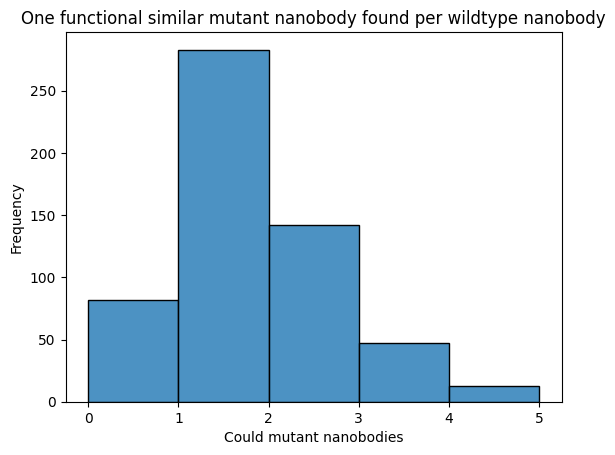

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.histplot(data=df_stat, x='mut_seq', binwidth=1, alpha=0.8)

plt.title('One functional similar mutant nanobody found per wildtype nanobody')
plt.xlabel('Could mutant nanobodies')
plt.ylabel('Frequency')
plt.savefig('figures/7_numberofalternative_nanobodies.png')
# plt.legend(title='Category')
plt.show()

In [19]:
import numpy as np
print("mean","median")
np.array(df_stat['mut_seq'].tolist()).mean(), np.median(np.array(df_stat['mut_seq'].tolist()))

mean median


(1.347442680776014, 1.0)

In [22]:
df_mut = df_merge.dropna()
df_mut["mutations"] = df_mut.apply(lambda x: x["wt_seq"] + ">" + x["mut"], axis=1)

/var/folders/t4/w0bqp6_x3fb93sb6l5_vlkn00000gn/T/ipykernel_28733/2020834371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mut["mutations"] = df_mut.apply(lambda x: x["wt_seq"] + ">" + x["mut"], axis=1)


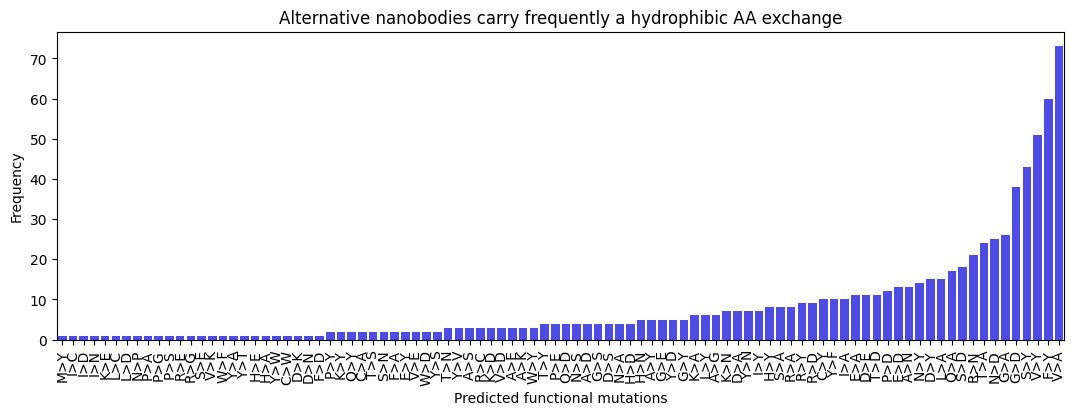

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(13, 4))

df_stat = df_mut[['id','mutations']].groupby('mutations').count().reset_index().sort_values('id')

sns.barplot(data=df_stat, y='id', x='mutations',  alpha=0.8, color='blue')

plt.title('Alternative nanobodies carry frequently a hydrophibic AA exchange')
plt.xlabel('Predicted functional mutations')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.savefig('figures/8_mutated_aa_nanobodies.png')
# plt.legend(title='Category')
plt.show()

# Show how mutations change the melting temperature landscape

In [67]:
import numpy as np
import pandas as pd
df_predictions = pd.read_csv("../predictions/all_tm_comparisons_tempro.csv", header=0, sep=";")
df_predictions.head()

,id,name,Actual_Tm,TEMPRO,ProTDet,DeepStabP_Cell37,DeepStabP_Lysate37,DeepStabP_Lysate22
0,sdab1,NRL-N-C2,67.5,68.172410,51.995130,54.784729,55.583185,55.945881
1,sdab2,NRL-N-C2-hop,65.0,65.598465,51.983513,54.160854,54.650911,54.055810
2,sdab3,NRL-N-E2,62.0,64.533890,52.293830,53.637676,54.985965,55.412668
3,sdab4,NRL-N-E2-hop,62.0,62.813786,52.310158,52.468925,53.243382,52.691291
4,sdab5,NRL-N-E10,70.0,71.235620,52.305046,51.909128,53.413302,54.142093


In [68]:
df_mutations_with_predictions = pd.read_csv("../data/mutated_seq_with_predictions.tsv", header=0, sep="\t")
df_mutations_with_predictions['tm'] = df_mutations_with_predictions['tm'].apply(lambda x: float(x.replace(',','.')))
df_mutations_with_predictions['id'] = df_mutations_with_predictions['id'].apply(lambda x: x.replace('>',''))

df_mutations_with_predictions = pd.merge(df_mutations_with_predictions,
                                         df_predictions[['id','TEMPRO']])
df_mutations_with_predictions['diff_pred_mut_vs_tm'] = df_mutations_with_predictions['predictions'] - df_mutations_with_predictions['tm']
df_mutations_with_predictions['diff_pred_mut_vs_tempro'] = df_mutations_with_predictions['predictions'] - df_mutations_with_predictions['TEMPRO']
df_mutations_with_predictions['conf'] = df_mutations_with_predictions.apply(lambda x: 1-(abs(x['diff_pred_mut_vs_tm']-x['diff_pred_mut_vs_tempro']))/max(abs(x['diff_pred_mut_vs_tm']),abs(x['diff_pred_mut_vs_tempro'])), axis=1)
df_mutations_with_predictions['crd3_pos_mut'] = df_mutations_with_predictions.apply(lambda x: x['position']-x['wt'].replace('<mask>',x['wt_seq']).find(x['crd3']), axis=1)
df_mutations_with_predictions['crd3_len'] = df_mutations_with_predictions.apply(lambda x: len(x['crd3']), axis=1)
df_mutations_with_predictions['crd3_pos_mut_rel'] = df_mutations_with_predictions.apply(lambda x: x['crd3_pos_mut']/x['crd3_len'], axis=1)

df_mutations_with_predictions.head()


,Unnamed: 0,id,tm,crd3,wt_seq,position,wt,mut,mut_seq,prob_mut,predictions,TEMPRO,diff_pred_mut_vs_tm,diff_pred_mut_vs_tempro,conf,crd3_pos_mut,crd3_len,crd3_pos_mut_rel
0,146,sdab1,67.5,AKYQAAVHQEKEDY,E,107,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,Y,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,0.806245,59.513460,68.172410,-7.986540,-8.658950,0.922345,11,14,0.785714
1,387,sdab3,62.0,ATNTRWTYFSPTVPDRYDY,T,97,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,A,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,0.867352,58.613075,64.533890,-3.386925,-5.920815,0.572037,1,19,0.052632
2,645,sdab4,62.0,ATNTRWTYFSPTVPDRYDY,T,97,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,A,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,0.720087,61.371735,62.813786,-0.628265,-1.442051,0.435675,1,19,0.052632
3,1616,sdab7,55.0,ASGRYLGGITSYSQGDFAP,S,98,EVQLQASGGGLVQAGDSLRLSCVAVSGRTISTFAMGWFRQAPGKER...,A,EVQLQASGGGLVQAGDSLRLSCVAVSGRTISTFAMGWFRQAPGKER...,0.778689,60.946945,56.719090,5.946945,4.227855,0.710929,1,19,0.052632
4,1880,sdab7,55.0,ASGRYLGGITSYSQGDFAP,P,115,EVQLQASGGGLVQAGDSLRLSCVAVSGRTISTFAMGWFRQAPGKER...,S,EVQLQASGGGLVQAGDSLRLSCVAVSGRTISTFAMGWFRQAPGKER...,0.528075,60.192284,56.719090,5.192284,3.473194,0.668914,18,19,0.947368


<AxesSubplot:xlabel='diff_pred_mut_vs_tempro', ylabel='diff_pred_mut_vs_tm'>

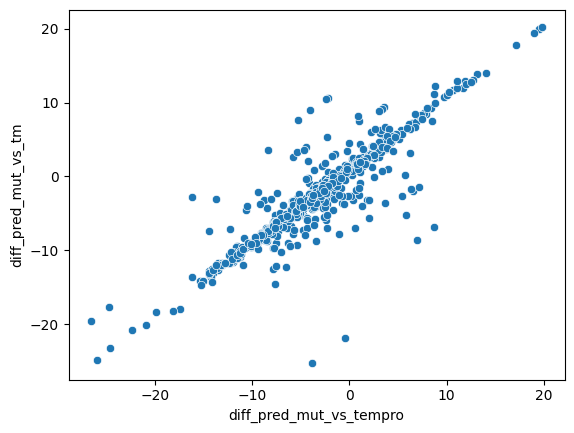

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define a continuous color palette
palette = sns.color_palette("light:#5A9", as_cmap=True)

# Create scatterplot
sns.scatterplot(x='diff_pred_mut_vs_tempro', y='diff_pred_mut_vs_tm', data=df_mutations_with_predictions)


In [70]:
!pip install biopython


In [71]:
from Bio.Align import substitution_matrices

# Load BLOSUM62 matrix
blosum62 = substitution_matrices.load("BLOSUM62")
blosum80 = substitution_matrices.load("BLOSUM80")
df_mutations_with_predictions['BLOSUM62'] = df_mutations_with_predictions.apply(lambda x: blosum62[(x['wt_seq'],x['mut'])], axis=1)
df_mutations_with_predictions['BLOSUM80'] = df_mutations_with_predictions.apply(lambda x: blosum80[(x['wt_seq'],x['mut'])], axis=1)

In [72]:
df_middle_motif = df_mutations_with_predictions[(df_mutations_with_predictions['crd3_pos_mut_rel']>=0.1) & (df_mutations_with_predictions['crd3_pos_mut_rel']<=0.9)]

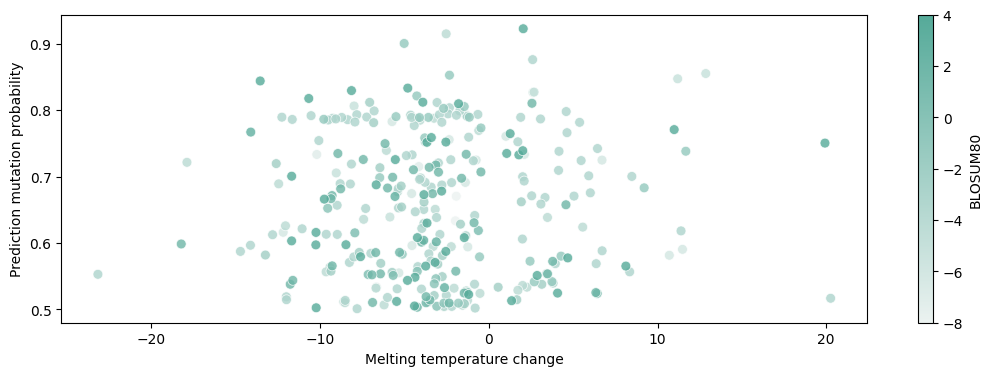

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define a continuous color palette
palette = sns.color_palette("light:#5A9", as_cmap=True)
plt.figure(figsize=(13, 4))

df_filtered = df_middle_motif[(df_middle_motif["conf"]>0.3) & (df_middle_motif["conf"]<=1)].sort_values('BLOSUM80')
# Create scatterplot
sns.scatterplot(x='diff_pred_mut_vs_tm', y='prob_mut', hue='BLOSUM80', data=df_filtered, palette=palette, s=50, alpha=0.8, legend=None)

# Add color bar for reference
norm = plt.Normalize(df_filtered['BLOSUM80'].min(), df_filtered['BLOSUM80'].max())
sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='BLOSUM80')

# Customize the plot (optional)
plt.title('')
plt.xlabel('Melting temperature change')
plt.ylabel('Prediction mutation probability')
plt.savefig('figures/9_melting_temperature_change.png')
# Show the plot
plt.show()


In [78]:
hydrophobic_aa = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W']
hydrophobic_aa_exchange = [a+">"+b for a in hydrophobic_aa for b in hydrophobic_aa]

#df_filtered_2 = df_filtered[(df_filtered['BLOSUM80']>-1) & (df_filtered['prob_mut']>0.5)  & (df_filtered['diff_pred_mut_vs_tm']>3)]
df_filtered_2 = df_mutations_with_predictions[(df_mutations_with_predictions['BLOSUM80']>-1) & (df_mutations_with_predictions['prob_mut']>0.5)  & (df_mutations_with_predictions['diff_pred_mut_vs_tm']>3) & (df_mutations_with_predictions["conf"]>0.3) & (df_mutations_with_predictions["conf"]<=1)]

df_filtered_2["mutations"] = df_filtered_2.apply(lambda x: x["wt_seq"] + ">" + x["mut"], axis=1)
df_filtered_2["hyprophobic_exchange"] = "no"
df_filtered_2.loc[df_filtered_2["mutations"].isin(hydrophobic_aa_exchange), "hyprophobic_exchange"] = "yes"

cols = df_filtered_2.columns.tolist()[1:]
df_filtered_2 = df_filtered_2[cols]

/var/folders/t4/w0bqp6_x3fb93sb6l5_vlkn00000gn/T/ipykernel_28733/3878753931.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2["mutations"] = df_filtered_2.apply(lambda x: x["wt_seq"] + ">" + x["mut"], axis=1)
/var/folders/t4/w0bqp6_x3fb93sb6l5_vlkn00000gn/T/ipykernel_28733/3878753931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2["hyprophobic_exchange"] = "no"


In [79]:
df_filtered_2.to_csv("../predictions/mutated_seq_with_predictions_tophits.csv",index=False, sep="\t")

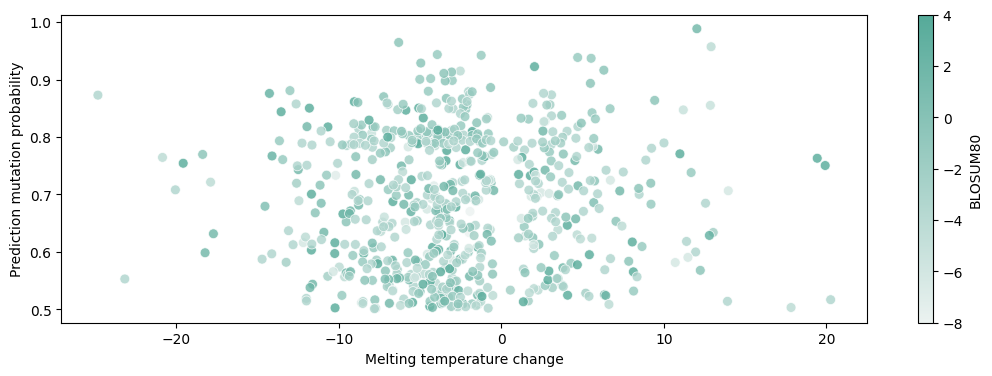

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define a continuous color palette
palette = sns.color_palette("light:#5A9", as_cmap=True)
plt.figure(figsize=(13, 4))

df_filtered_2 = df_mutations_with_predictions[(df_mutations_with_predictions["conf"]>0.3) & (df_mutations_with_predictions["conf"]<=1)]
sns.scatterplot(x='diff_pred_mut_vs_tm', y='prob_mut', hue='BLOSUM80', data=df_filtered_2, palette=palette, s=50, alpha=0.8, legend=None)

# Add color bar for reference
norm = plt.Normalize(df_filtered['BLOSUM80'].min(), df_filtered['BLOSUM80'].max())
sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='BLOSUM80')

# Customize the plot (optional)
plt.title('')
plt.xlabel('Melting temperature change')
plt.ylabel('Prediction mutation probability')
plt.savefig('figures/10_melting_temperature_all.png')
# Show the plot
plt.show()

/var/folders/t4/w0bqp6_x3fb93sb6l5_vlkn00000gn/T/ipykernel_28733/2775786281.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2["mutations"] = df_filtered_2.apply(lambda x: x["wt_seq"] + ">" + x["mut"], axis=1)
/var/folders/t4/w0bqp6_x3fb93sb6l5_vlkn00000gn/T/ipykernel_28733/2775786281.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2["hyprophobic_exchange"] = "no"


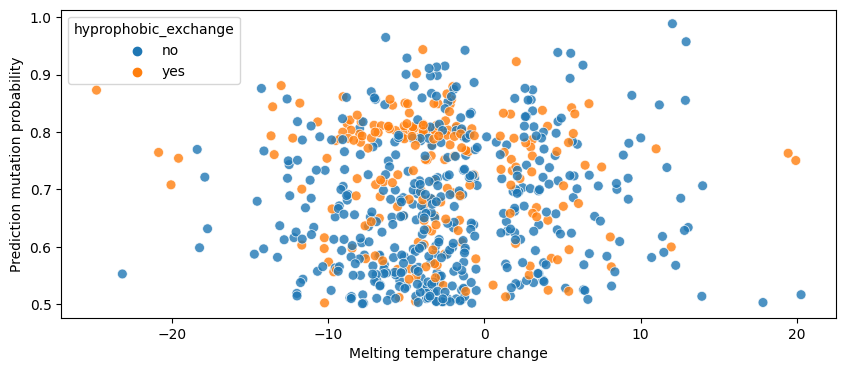

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

hydrophobic_aa = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W']
hydrophobic_aa_exchange = [a+">"+b for a in hydrophobic_aa for b in hydrophobic_aa]

# Define a continuous color palette
palette = sns.color_palette("light:#5A9", as_cmap=True)
plt.figure(figsize=(10, 4))

df_filtered_2 = df_mutations_with_predictions[(df_mutations_with_predictions["conf"]>0.3) & (df_mutations_with_predictions["conf"]<=1)]
df_filtered_2["mutations"] = df_filtered_2.apply(lambda x: x["wt_seq"] + ">" + x["mut"], axis=1)
df_filtered_2["hyprophobic_exchange"] = "no"
df_filtered_2.loc[df_filtered_2["mutations"].isin(hydrophobic_aa_exchange), "hyprophobic_exchange"] = "yes"

sns.scatterplot(x='diff_pred_mut_vs_tm', y='prob_mut', hue='hyprophobic_exchange', data=df_filtered_2, s=50, alpha=0.8)

# Customize the plot (optional)
plt.title('')
plt.xlabel('Melting temperature change')
plt.ylabel('Prediction mutation probability')
plt.savefig('figures/11_melting_temperature_all_colored_by_aa.png')
# Show the plot
plt.show()

In [66]:
df_filtered_2[df_filtered_2['diff_pred_mut_vs_tm']>10].sort_values('prob_mut')

,Unnamed: 0,id,tm,crd3,wt_seq,position,wt,mut,mut_seq,prob_mut,...,diff_pred_mut_vs_tm,diff_pred_mut_vs_tempro,conf,crd3_pos_mut,crd3_len,crd3_pos_mut_rel,BLOSUM62,BLOSUM80,mutations,hyprophobic_exchange
229,49147,sdab214,43.00,YAPDRWHTY,Y,95,DVQLQASGGGLVQAGGSLRLSCAVSDNTTSLNGMGYYRGPPGKQRE...,N,DVQLQASGGGLVQAGGSLRLSCAVSDNTTSLNGMGYYRGPPGKQRE...,0.503123,...,17.826210,17.157322,0.962477,0,9,0.000000,-2.0,-4.0,Y>N,no
256,53803,sdab234,50.75,AAGRPPCGSIFKPGYYYYGMDY,G,97,MVQLQESGGGSVQAGGSLRLSCVASGDTASMYCMGWFRQAPGKERE...,D,MVQLQESGGGSVQAGGSLRLSCVASGDTASMYCMGWFRQAPGKERE...,0.513922,...,13.913750,13.112583,0.942419,2,22,0.090909,-1.0,-3.0,G>D,no
403,77938,sdab344,47.00,AAVRARYYISKHATDYGF,G,111,EVQLQASGGGLVQAGDSLRLPCAASLRTFGSYALGWFRQAPGKERE...,D,EVQLQASGGGLVQAGDSLRLPCAASLRTFGSYALGWFRQAPGKERE...,0.516732,...,20.261955,19.800419,0.977222,16,18,0.888889,-1.0,-3.0,G>D,no
727,123737,sdab544,46.00,KAEVVAGPYAGHDY,K,95,QVQLQESGGGLVQAGGSLRLSCAASGITYSRSTMGWYRQVPGKQRE...,N,QVQLQESGGGLVQAGGSLRLSCAASGITYSRSTMGWYRQVPGKQRE...,0.567833,...,12.241066,8.819550,0.720489,0,14,0.000000,0.0,0.0,K>N,no
7,4062,sdab15,54.40,YVYVGSSY,V,99,QVQLVESGGGLVQAGGSLRLSCAASGFPVQAREMEWYRQAPGKERE...,D,QVQLVESGGGLVQAGGSLRLSCAASGFPVQAREMEWYRQAPGKERE...,0.581493,...,10.699830,9.704494,0.906976,3,8,0.375000,-3.0,-6.0,V>D,no
258,54838,sdab237,48.00,AADALPYSAQSMSTRNPGY,P,109,DVQLQASGGGLVQAGASLRLSCAASGFTYTMGWFRQAPGQEREFVA...,Y,DVQLQASGGGLVQAGASLRLSCAASGFTYTMGWFRQAPGQEREFVA...,0.590403,...,11.480404,10.247627,0.892619,16,19,0.842105,-3.0,-6.0,P>Y,no
58,11841,sdab53,58.60,ALSARWYKRAEPDFDY,L,98,QVQLQESGGGSVQAGGSLRLSCEVSGYSETTYRIGWFRLPPGLETR...,A,QVQLQESGGGSVQAGGSLRLSCEVSGYSETTYRIGWFRLPPGLETR...,0.599830,...,11.955040,11.035604,0.923092,1,16,0.062500,-1.0,-3.0,L>A,yes
33,8362,sdab36,51.80,AAGVGVVDCT,T,102,QVQLQESGGGSVQAGGSLRLSCESSGMTFSVYNLGLRQAPGQECEL...,Y,QVQLQESGGGSVQAGGSLRLSCESSGMTFSVYNLGLRQAPGQECEL...,0.618186,...,11.394054,10.211041,0.896173,9,10,0.900000,-2.0,-3.0,T>Y,no
398,77000,sdab340,55.00,YQSIRPWPGSSYEAH,H,109,EVQLQASGGGLVRPGGSLRLSCAASGSFFTIDTMAWYRQAPGRRRE...,Y,EVQLQASGGGLVRPGGSLRLSCAASGSFFTIDTMAWYRQAPGRRRE...,0.628633,...,12.802120,12.467170,0.973836,14,15,0.933333,2.0,3.0,H>Y,no
397,76780,sdab340,55.00,YQSIRPWPGSSYEAH,Q,96,EVQLQASGGGLVRPGGSLRLSCAASGSFFTIDTMAWYRQAPGRRRE...,A,EVQLQASGGGLVRPGGSLRLSCAASGSFFTIDTMAWYRQAPGRRRE...,0.633809,...,13.038560,12.703610,0.974311,1,15,0.066667,-1.0,-2.0,Q>A,no
